In [5]:
import activations
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# create vector x with 1000 linear spaced values between -5 and 5
x = np.linspace(-5, 5, 1000)

In [77]:
functions = {
    "ReLU": activations.ReLU,
    "Sigmoid": activations.Sigmoid,
    "Heaviside": activations.Heaviside,
    "Tanh": activations.Tanh,
    "LeakyReLU": activations.LeakyReLU,
    "PReLU": activations.PReLU,
    "ParamSigmoid": activations.ParametrisedSigmoid,
    "SiLU": activations.SiLU,
    "SELU": activations.SELU,
    "ELISH": activations.ELiSH,
    "SobolevaModTanh": activations.SobolevaModTanh,
}

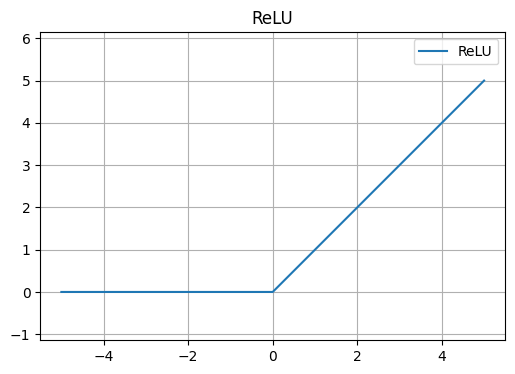

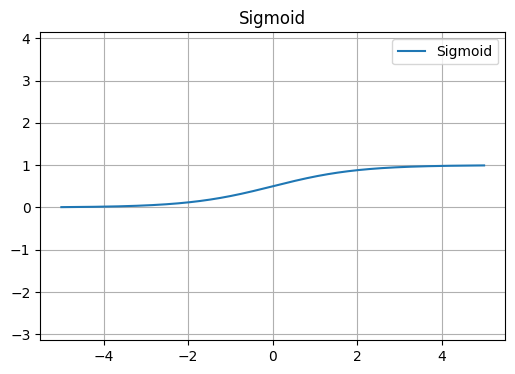

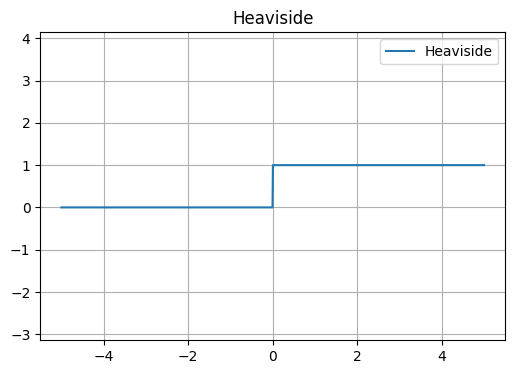

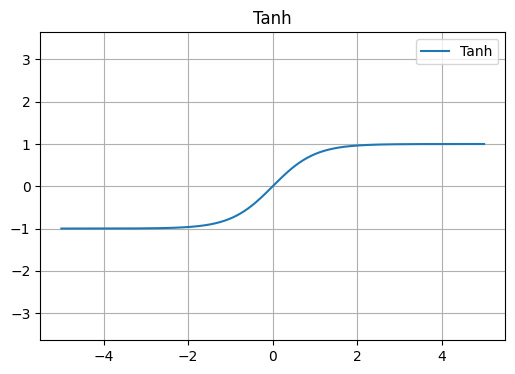

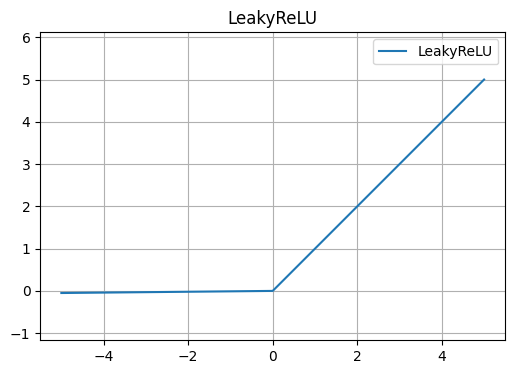

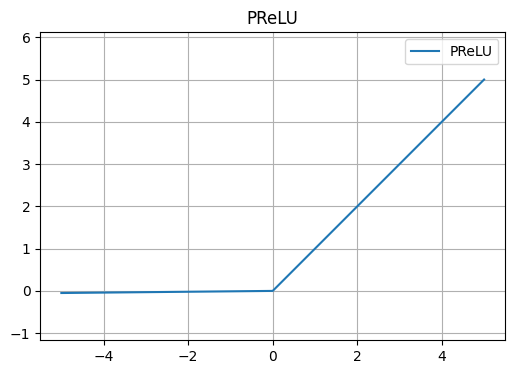

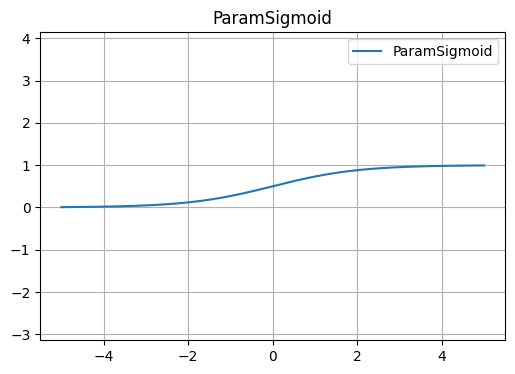

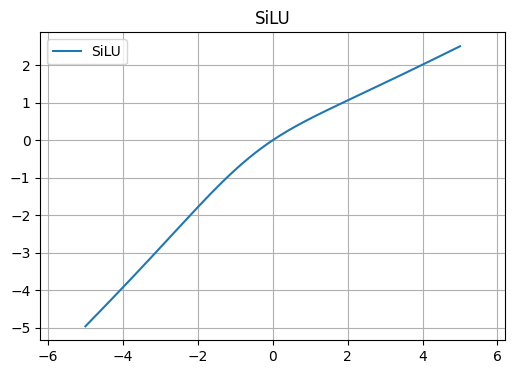

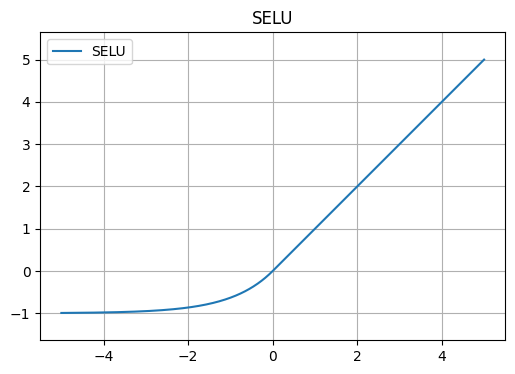

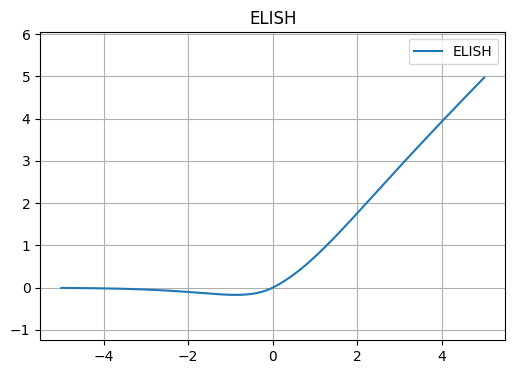

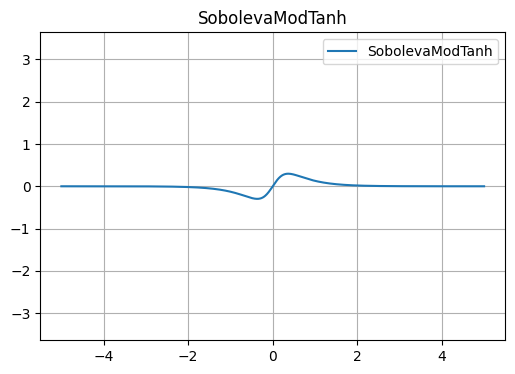

In [78]:
# for each activation function in functions, compute the output and plot graphs of all the activation functions, with x on the x-axis and the output on the y-axis and a key with the name of the activation function, with separate graphs for each function
for name, func in functions.items():
    if name == "SobolevaModTanh":
        params = np.array([1, 2, 3, 4], dtype=float)
        y_list = [func(float(i), params) for i in x]
    else:
        y_list = [func(float(i)) for i in x]

    # force numeric array (will raise if outputs are non-scalar/non-convertible)
    y = np.array(y_list, dtype=float)

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=name)
    plt.title(name)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

Task 2 - Perceptron Solver

In [35]:
# import the Iris dataset from iris.csv
import pandas as pd
# load the dataset
data = pd.read_csv('iris.csv')

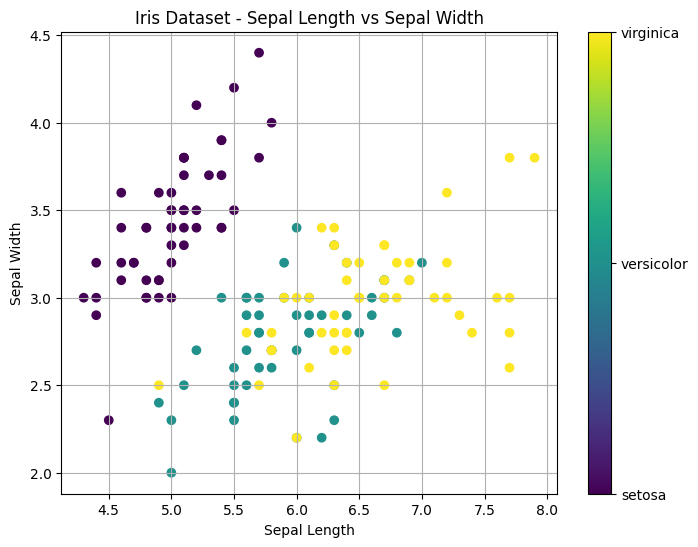

In [51]:
# visualise to see if the data is linearly separable
plt.figure(figsize=(8, 6))
plt.scatter(data['sepal_length'], data['sepal_width'], c=data['species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
# add color bar with species names
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.ax.set_yticklabels(data['species'].astype('category').cat.categories)
plt.grid(True)
plt.show()

In [192]:
# create train and test sets
from sklearn.model_selection import train_test_split
X = data[['sepal_length', 'sepal_width']]
# set species to 1 if 'setosa', else 0
y = (data['species'] == 'setosa').astype(int)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

weights = np.zeros(X.shape[1], dtype=float)
bias = 1
lr = 0.1
max_iter = 1000


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64


In [184]:
X = np.asarray(X_train)
y = np.asarray(y_train)

for _ in range(max_iter):
    errors = 0
    for Xi, yi in zip(X, y):
        v = np.dot(weights, Xi) + bias
        output = activations.Heaviside(v)
        delta = yi - output
        if delta != 0:
            weights += lr * delta * Xi
            bias += lr * delta
            errors += 1
    if errors == 0:
        break

print(weights, bias)


[-0.73  0.92] 1.1


In [185]:
X = np.asarray(X_test)

nets = X.dot(weights) + bias
outputs = [activations.Heaviside(i) for i in nets]
print(outputs)

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]


<Figure size 800x600 with 0 Axes>

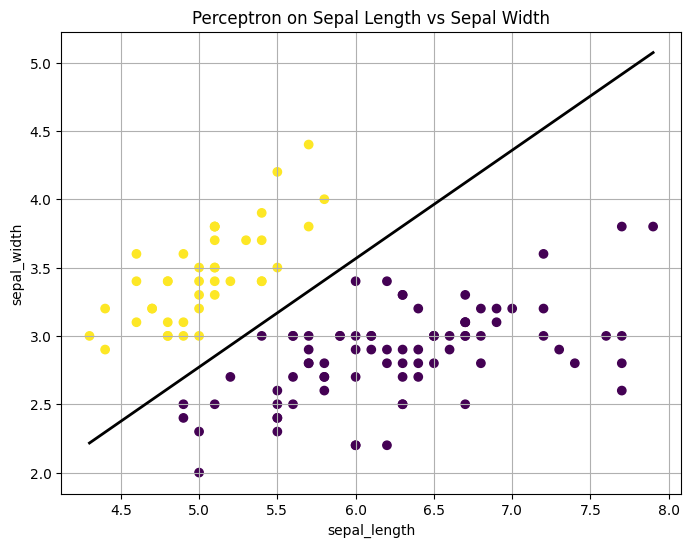

In [186]:
plt.figure(figsize=(8,6))

X = np.asarray(X_train)
y = np.asarray(y_train)
w = np.asarray(weights)
b = float(bias)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1],c=y, cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Perceptron on Sepal Length vs Sepal Width')

x_min, x_max = X[:,0].min(), X[:,0].max()
xs = np.linspace(x_min, x_max, 200)
ys = -(w[0] * xs + b) / w[1]
plt.plot(xs, ys, color='black', linewidth=2)

plt.grid(True)
plt.show()

In [187]:
# calculate MSE on test set
y_test = np.asarray(y_test)
mse = np.mean((y_test - outputs) ** 2)
print(f'Mean Squared Error on test set: {mse}')

Mean Squared Error on test set: 0.03333333333333333


In [193]:
from Perceptron import *
p = Perceptron(input_size=2, learning_rate=0.1, max_iter=1000)

p.fit(X_train, y_train)
predictions = p.predict(X_test)
mse = np.mean((y_test - predictions) ** 2)
print(f'Mean Squared Error on test set using Perceptron class: {mse}')

Mean Squared Error on test set using Perceptron class: 0.03333333333333333
